# Kicking Insights: Exploring the Correlation of Soccer Player Attributes and their Relation to Overall Player Ability

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Cleaning</a></li> 
<li><a href="#Analysis">Analysis</a></li>
<li><a href="#visualizations">Visualizations</a></li>
<li><a href="#findings">Findings and Limitations</a></li>
</ul>

<a id='intro'></a>
# Introduction

> Welcome to my data analysis project titled 'Kicking Insights: Exploring the Correlation of Soccer Player Attributes and their Impact on Player Ability'. The objective of this project is to examine the relationship among different soccer player metrics, including age, speed, height, stamina, and more. The investigation will categorize and prioritize these attributes according to their correlation levels, offering valuable insights into the attributes that have the stongest correlation to a player's overall performance rating. This information could potentially be useful for coaches in terms of strategic planning or tactical adjustments. It could also benefit scouts and recruiters by helping to identify players who are likely to make a positive impact on the team. Hopefully, the study can serve as a valuable tool for decision-makers in soccer teams, providing data-driven insights that enhance player recruitment, development, and overall team strategy.

> The dataset is sourced from kaggle.com and provides ratings of soccer player attributes, their names, salaries, and positions. The data is gathered from FIFA 23, a soccer simulation video game published by Electronic Arts. It contains data for almost 20,000 players, including ratings of a myriad of attributes, such as ball control, height, weight, stamina, speed, aggression, and many others. The link is provided below:
>
>https://www.kaggle.com/datasets/sanjeetsinghnaik/fifa-23-players-dataset



<a id='wrangling'></a>
## Data Wrangling and Cleaning

> The data for this project is held in a .csv file. I will use the pandas library to create a dataframe, and then perform cleaning and wrangling operations. I will check the dimensions of the dataset, check for duplicate rows, ensure there are no null values, and if needed, rename columns.

> Let's begin the analysis by importing the necessary packages we will need.

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Create dataframe from 'FIFA_23.csv'.
df = pd.read_csv('FIFA_23.csv')

> Now that the dataframe is created, we will begin the exploratory and cleaning processes.

In [3]:
# View the dimensions of the dataframe. How many rows? How many columns?
df.shape

(18539, 89)

In [4]:
# View 10 random rows of the dataframe.

pd.set_option('display.max_columns', None)
df.head(10)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,175,71,2226,471,Liverpool,270000,213700000,RW,2023,11,2017,-,Left,3,4,4,-,-,-,-,High,Medium,90,89,82,90,45,75,80,93,59,84,84,90,84,69,77,88,89,91,90,93,91,83,69,87,75,85,63,55,92,85,86,92,38,43,41,14,14,9,11,14,89,88,88,88,88,88,90,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,199,96,1334,473,Real Madrid CF,250000,191300000,GK,2026,1,2018,-,Left,3,1,4,Belgium,https://cdn.sofifa.net/flags/be.png,GK,1,Medium,Medium,84,89,75,90,46,89,14,14,13,33,12,13,19,20,35,23,42,52,63,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,84,89,75,89,90,34,29,3

In [5]:
# View what kind of data each column holds. Strings? Numerical data? Do all columns have the same Non-Null count?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [6]:
# Get a sum of the duplicated rows.
df.duplicated().sum()

119

In [7]:
# Drop the duplicated rows from the dataframe. 
df = df.drop_duplicates()

In [8]:
# Check the new dimensions of the dataframe...there should be 119 less rows.
df.shape

(18420, 89)

In [9]:
# Make sure there are no null counts
df.isnull().sum()

Known As          0
Full Name         0
Overall           0
Potential         0
Value(in Euro)    0
                 ..
RWB Rating        0
LB Rating         0
CB Rating         0
RB Rating         0
GK Rating         0
Length: 89, dtype: int64

In [10]:
# Check for outliers by paying special attention to the 'min' and 'max' rows.
df.describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,Joined On,Weak Foot Rating,Skill Moves,International Reputation,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18420.000000,18420.000000,1.842000e+04,18420.000000,18420.000000,18420.000000,18420.00000,18420.000000,18420.000000,1.842000e+04,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000
mean,65.792942,70.963301,2.842697e+06,25.243920,181.550814,75.170141,1600.67139,357.650543,8733.099891,5.015212e+06,2020.369110,2.944680,2.363626,1.086265,67.976059,53.732030,57.967264,63.054669,50.183550,64.736971,49.412975,46.200597,51.788056,59.007872,42.472041,55.828990,47.630293,42.965689,53.499457,58.450760,64.687676,64.789468,63.483768,61.475299,64.042780,57.770304,64.773236,62.985016,65.124213,46.767861,55.612269,46.785722,50.463626,54.129479,47.957275,57.967427,46.680239,48.330890,46.203637,16.412595,16.168024,16.071336,16.215798,16.484148,56.668730,55.759338,55.654126,55.654126,55.654126,55.759338,57.888708,58.390011,57.309989,58.390011,56.219110,55.864875,56.219110,55.588111,54.468621,55.588111,23.259175
std,6.770177,6.170634,7.645260e+06,4.725456,6.855181,7.006937,272.81089,39.541870,19452.416115,1.468605e+07,2.055707,0.673408,0.770909,0.359005,10.647516,13.609596,9.704352,9.324139,16.366477,9.572480,17.875491,19.607819,17.306326,14.271882,17.623566,18.741829,17.898193,16.995882,14.618698,16.582193,15.275493,15.103234,14.894242,8.885209,14.471368,12.945490,12.291803,16.265509,12.615303,19.348944,16.894863,20.643591,19.642285,13.461163,15.730153,12.019431,20.331877,21.166152,20.677479,17.595506,16.930030,16.686118,17.094347,17.933909,13.463248,14.618414,14.202906,14.202906,14.202906,14.618414,13.890663,13.972513,13.156296,13.972513,13.887301,13.854782,13.887301,14.141491,14.725755,14.141491,15.114423
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.00000,224.000000,0.000000,0.000000e+00,2002.000000,1.000000,1.000000,1.000000,28.000000,16.000000,25.000000,28.000000,15.000000,30.000000,6.000000,3.000000,5.000000,10.000000,3.000000,3.000000,6.000000,4.000000,9.000000,5.000000,14.000000,15.000000,18.000000,30.000000,20.000000,18.000000,22.000000,14.000000,25.000000,4.000000,10.000000,3.000000,2.000000,10.000000,6.000000,13.000000,3.000000,6.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,19.000000,14.000000,15.000000,15.000000,15.000000,14.000000,17.000000,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1469.0000

In [11]:
# Rename columns that have a typo, or for readablity.
df = df.rename(columns={' GoalkeeperKicking': 'Goalkeeper Kicking', 'TotalStats': 'Total Stats',
                       'BaseStats': 'Base Stats', 'LongPassing': 'Long Passing', 'BallControl': 'Ball Control'})

> Overall, the dataset did not need much cleaning, having only a few duplicate rows and no null values. At this point, the dataframe dimensions have been assessed, and duplicates removed. I have ensured that there are no null values and validated data types for consistency. I then checked column names and made a few adjustments for consistency. These steps were crucial in preparing a clean and structured dataset for further analysis. 
>
> Next, I will begin streamlining the dataset by removing columns that are irrelevant to the scope of this study. Among these columns are players' names, jersey numbers, image links, and others. I will also remove columns that contain data that is specific to goalkeepers, as they play the most specialized position and would require a separate analysis. I will remove not only the columns specific to goalkeepers but also players whose primary position is that of goalkeeper.

In [12]:
# Remove Goalkeepers from the df.
df = df[df['Best Position'] != 'GK'].reset_index(drop=True)

In [13]:
# Drop non-numeric columns, as well as aggregate columns.

columns_to_drop = ['Known As', 'Full Name', 'Positions Played', 'Nationality', 'Best Position',
                   'Image Link', 'Total Stats', 'Base Stats', 'Club Name', 'Club Position', 'Skill Moves',                   'Contract Until', 
                   'Club Jersey Number', 'Joined On', 'On Loan', 'Preferred Foot', 'National Team Name', 
                   'National Team Image Link', 'National Team Position', 'National Team Jersey Number',
                   'Attacking Work Rate', 'Defensive Work Rate', 'Pace Total', 'Passing Total', 'Dribbling Total',
                  'Defending Total', 'Shooting Total', 'Physicality Total', 'Goalkeeper Diving', 
                  'Goalkeeper Handling', 'Goalkeeper Kicking', 'Goalkeeper Positioning', 'Goalkeeper Reflexes', 
                  'ST Rating', 'LW Rating', 'LF Rating', 'CF Rating', 'RF Rating', 'RW Rating', 'CAM Rating', 
                  'LM Rating', 'CM Rating', 'RM Rating', 'LWB Rating', 'CDM Rating', 'RWB Rating', 'LB Rating', 
                  'CB Rating', 'RB Rating', 'GK Rating', 'Value(in Euro)', 'Wage(in Euro)', 'Release Clause', 
                  'Weak Foot Rating', 'International Reputation', 'Potential']

# Drop the columns
df = df.drop(columns = columns_to_drop)

In [14]:
# View the df, check for success.
df.head(1)

,Overall,Age,Height(in cm),Weight(in kg),Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle
0,91,35,169,67,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24


In [15]:
# View the new dimensions
df.shape

(16367, 33)

In [16]:
# View the remaining columns of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16367 entries, 0 to 16366
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Overall            16367 non-null  int64
 1   Age                16367 non-null  int64
 2   Height(in cm)      16367 non-null  int64
 3   Weight(in kg)      16367 non-null  int64
 4   Crossing           16367 non-null  int64
 5   Finishing          16367 non-null  int64
 6   Heading Accuracy   16367 non-null  int64
 7   Short Passing      16367 non-null  int64
 8   Volleys            16367 non-null  int64
 9   Dribbling          16367 non-null  int64
 10  Curve              16367 non-null  int64
 11  Freekick Accuracy  16367 non-null  int64
 12  Long Passing       16367 non-null  int64
 13  Ball Control       16367 non-null  int64
 14  Acceleration       16367 non-null  int64
 15  Sprint Speed       16367 non-null  int64
 16  Agility            16367 non-null  int64
 17  Reactions   

> Next, I will group the attributes by category. The categories are 'pace', 'shooting', 'passing', 'movement', 'defending', 'physical'. Categories such as age, weight, and height will remain. I will later use these groups of attributes for further analysis. Information about groups of attributes comes from this website: https://fifauteam.com/fifa-21-attributes-guide/

In [17]:
# Create lists of attributes, grouped by the six general categories of attributes.

pace = ['Acceleration', 'Sprint Speed']

shooting = ['Finishing', 'Heading Accuracy', 'Long Shots', 'Penalties', 'Positioning', 'Shot Power', 'Volleys']

passing = ['Crossing', 'Curve', 'Freekick Accuracy', 'Long Passing', 'Short Passing', 'Vision']

movement = ['Agility', 'Balance', 'Ball Control', 'Composure', 'Dribbling', 'Reactions']

defending = ['Marking', 'Interceptions', 'Sliding Tackle', 'Standing Tackle']

physical = ['Aggression', 'Jumping', 'Stamina', 'Strength']

all_columns = df.columns.tolist()

> Now that the dataset has been cleaned, and all irrelevant columns and rows removed, I can begin exploring the dataset.


<a id='Analysis'></a>
## Analysis
>
### The hypothesis:
>
> Null Hypothesis: There is no strong correlation (correlation coefficient 0.65 or above, or -0.65 and below) between the overall rating and any other attribute being tested.
>
> Alternative Hypothesis: There is a strong correlation correlation (correlation coefficient 0.65 or above, or -0.65 and below) between the overall rating and at least one of the attributes being tested.
>
> Since this analysis will focus on finding correlations between a player's 'Overall' rating and other attributes, I will begin by creating a correlation matrix and then displaying a heatmap, helping us to quickly see any patterns that may emerge. 
>
#### Correlation matrix
>The correlation coefficient produced by the matrix quantifies the strength and direction of a linear relationship between two variables. It ranges from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation. Each cell in the correlation matrix represents the correlation between the variables corresponding to the row and column. 
>
#### Heatmap
>A heatmap is a graphical representation of data where values in a matrix are represented as colors. In the context of correlation matrices, a heatmap is used to visually represent the strength and direction of correlations between variables. The color intensity corresponds to the magnitude of the correlation coefficient, the more saturated the color, the stronger the correlation coefficient. Heatmaps provide a quick and intuitive way to identify patterns and relationships in the data. 

In [18]:
# Create a correlation matrix
df_cor_matrix = df.corr()
df_cor_matrix

,Overall,Age,Height(in cm),Weight(in kg),Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle
Overall,1.000000,0.439484,0.058530,0.153831,0.518091,0.388410,0.483031,0.781633,0.434493,0.563262,0.519805,0.443266,0.631055,0.763731,0.160816,0.182161,0.247503,0.873307,0.116043,0.556885,0.257503,0.490961,0.343998,0.477377,0.471650,0.330660,0.453473,0.549554,0.389731,0.811072,0.341191,0.290674,0.254011
Age,0.439484,1.000000,0.052558,0.205861,0.255597,0.159975,0.350469,0.322043,0.233286,0.124005,0.259199,0.294522,0.312257,0.260051,-0.203524,-0.190189,-0.016018,0.434002,-0.053599,0.306358,0.251144,0.264370,0.366878,0.264981,0.376138,0.249486,0.203761,0.241194,0.246567,0.438048,0.256285,0.187162,0.165287
Height(in cm),0.058530,0.052558,1.000000,0.738947,-0.378129,-0.211637,0.524321,-0.107599,-0.175040,-0.349033,-0.319466,-0.289429,-0.129596,-0.196793,-0.463294,-0.316790,-0.593827,0.058213,-0.754690,-0.070133,0.179338,-0.045397,0.655163,-0.234392,0.232339,0.141560,-0.288838,-0.288606,-0.145014,0.002303,0.159529,0.141609,0.127128
Weight(in kg),0.153831,0.205861,0.738947,1.000000,-0.279388,-0.134726,0.524463,-0.034517,-0.092971,-0.268474,-0.229799,-0.187483,-0.071139,-0.119384,-0.411450,-0.284824,-0.502372,0.141185,-0.621030,0.022095,0.231381,0.013783,0.716956,-0.134212,0.288003,0.143070,-0.194988,-0.213760,-0.055332,0.085672,0.165156,0.135616,0.117360
Crossing,0.518091,0.255597,-0.378129,-0.279388,1.000000,0.446081,-0.122537,0.579842,0.477680,0.715595,0.761306,0.617589,0.552401,0.655907,0.438128,0.368914,0.566370,0.438026,0.472248,0.470963,-0.088691,0.344857,-0.191440,0.554824,0.106268,0.120971,0.611263,0.661939,0.379875,0.493548,0.108136,0.098941,0.087632
Finishing,0.388410,0.159975,-0.211637,-0.134726,0.446081,1.000000,0.011906,0.413193,0.837928,0.725309,0.644027,0.625298,0.253318,0.657228,0.364670,0.315310,0.490145,0.366862,0.339201,0.750011,-0.099994,0.145967,-0.112418,0.847413,-0.165886,-0.473454,0.841128,0.687074,0.790985,0.466770,-0.485265,-0.512741,-0.546546
Heading Accuracy,0.483031,0.350469,0.524321,0.524463,-0.122537,0.011906,1.000000,0.225424,0.076040,-0.086869,-0.072303,-0.067585,0.120241,0.138527,-0.321515,-0.199775,-0.355888,0.465175,-0.428898,0.199008,0.496712,0.185306,0.671381,0.024419,0.481125,0.260969,-0.017879,-0.051320,0.124445,0.357578,0.281356,0.233812,0.217178
Short Passing,0.781633,0.322043,-0.107599,-0.034517,0.579842,0.413193,0.225424,1.000000,0.447421,0.630157,0.600143,0.558573,0.861936,0.812338,0.120938,0.086236,0.319461,0.716586,0.243859,0.567897,0.064320,0.401768,0.100557,0.550731,0.366600,0.327435,0.494155,0.719290,0.391208,0.739523,0.317625,0.296774,0.259635
Volleys,0.434493,0.233286,-0.175040,-0.092971,0.477680,0.837928,0.076040,0.447421,1.000000,0.676739,0.693436,0.658449,0.304910,0.645746,0.302236,0.254849,0.446517,0.419770,0.313343,0.761131,-0.051148,0.144392,-0.061038,0.804444,-0.063819,-0.362460,0.765500,0.661155,0.762419,0.522282,-0.373767,-0.406888,-0.440592
Dribbling,0.563262,0.124005,-0.349033,-0.268474,0.715595,0.725309,-0.086869,0.630157,0.676739,1.000000,0.756051,0.634214,0.504918,0.844379,0.515423,0.442685,0.650544,0.497188,0.496672,0.650782,-0.112579,0.284846,-0.201658,0.738906,-0.010688,-0.166868,0.805664,0.788045,0.579548,0.581102,-0.180239,-0.193700,-0.215880


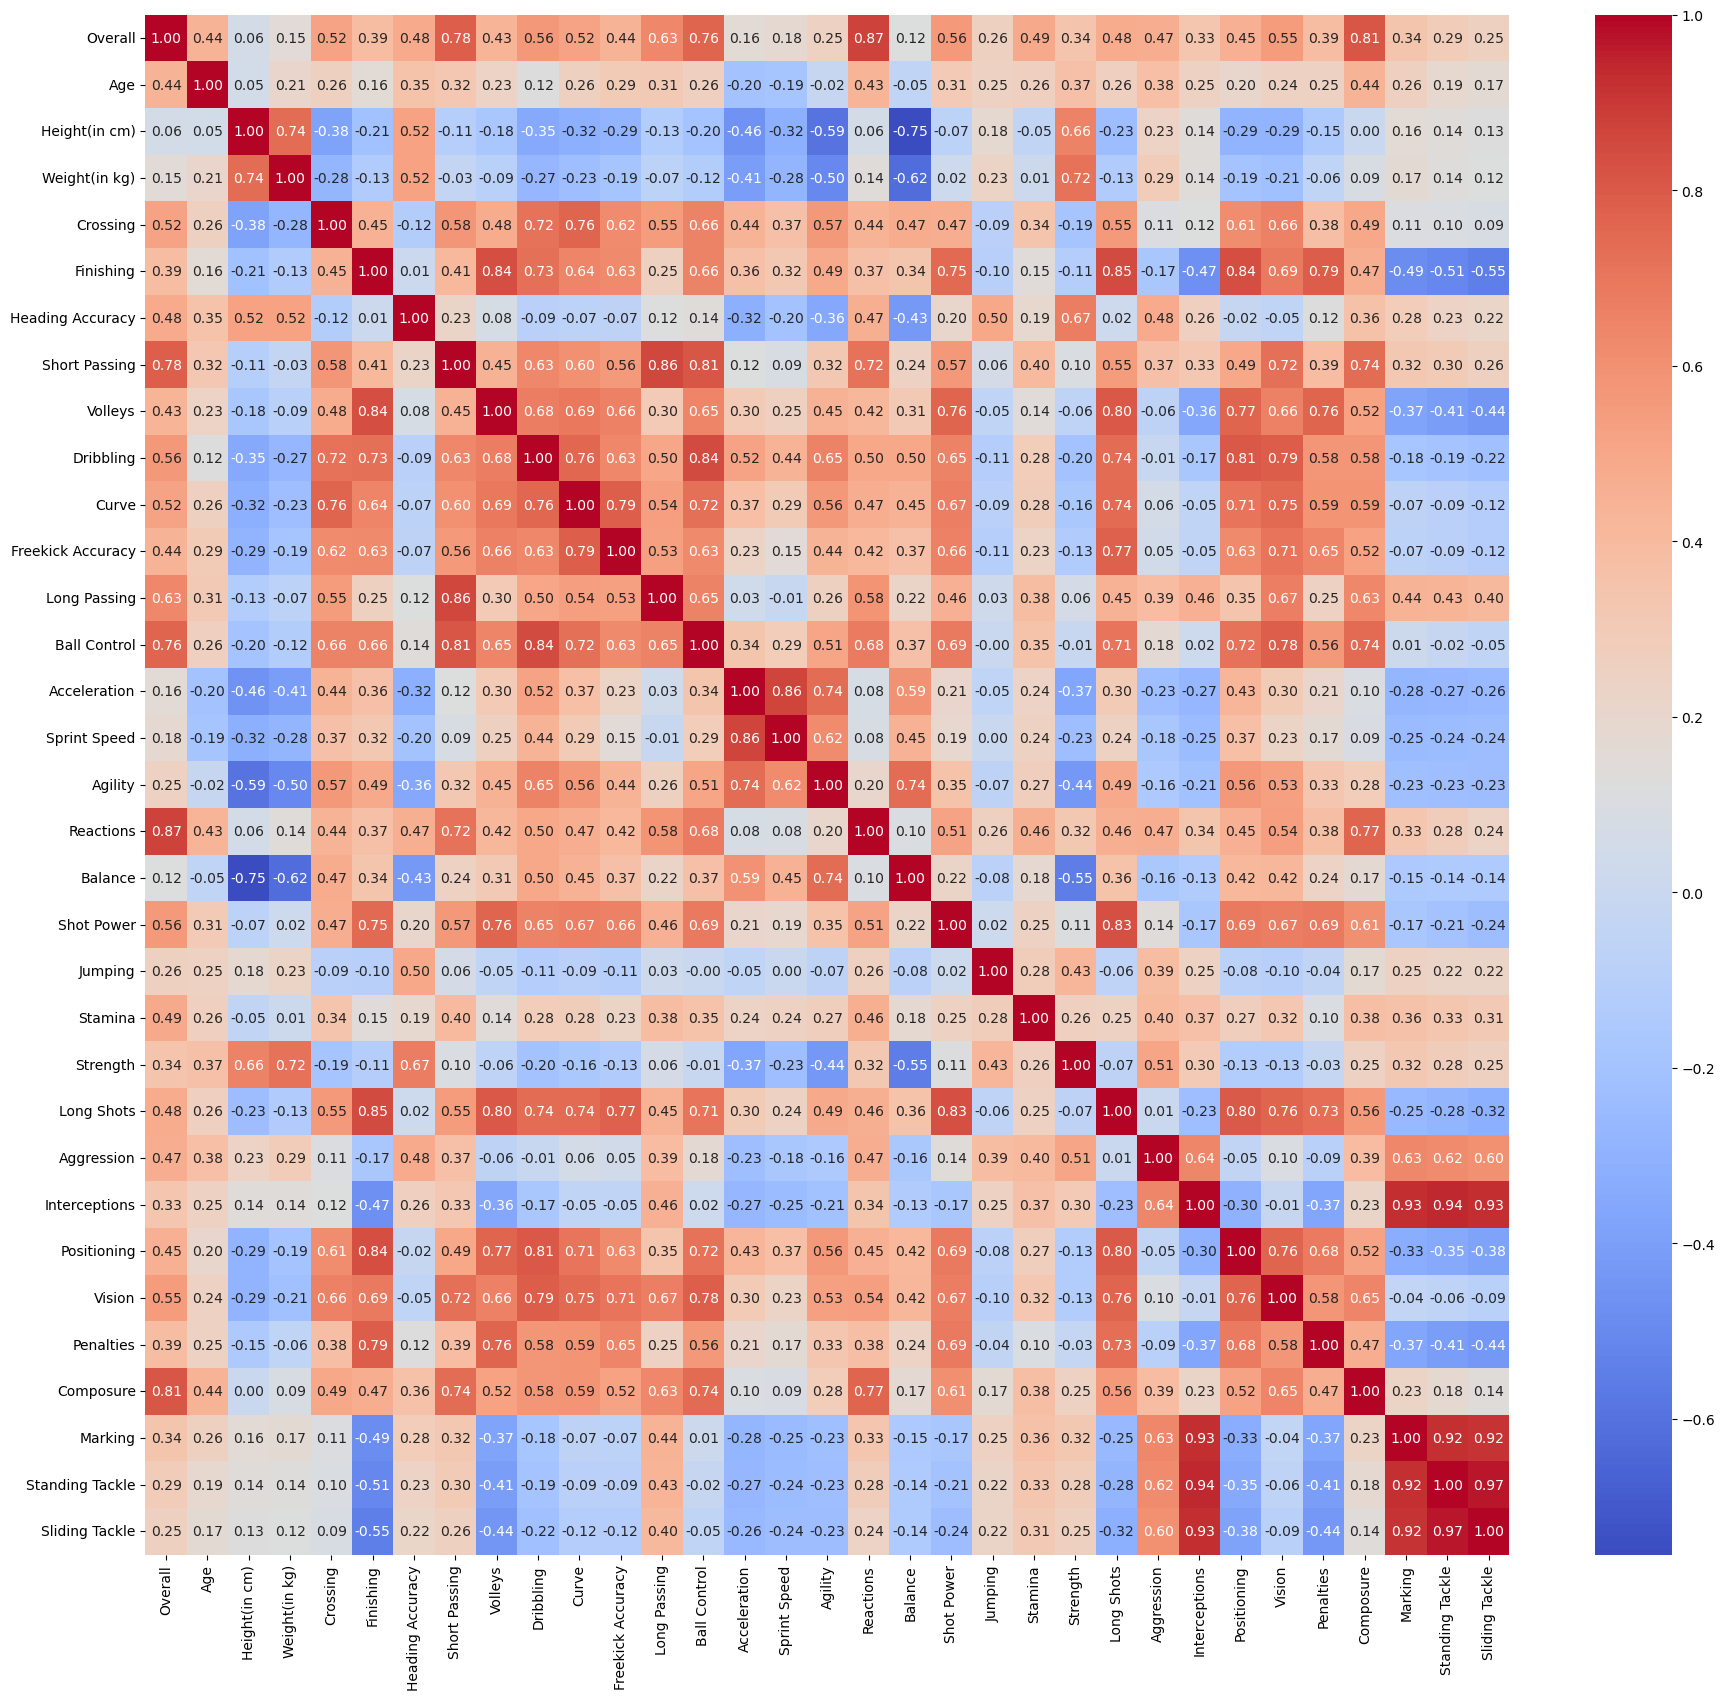

In [19]:
# Adjust the size of the plot
plt.figure(figsize=(22, 20))

# Create the Seaborn heatmap
sns.heatmap(df_cor_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()

In [20]:
# Create a function to calculate and display correlation coefficients and p-values for an individual attribute 
# against other attributes of our choosing.
def calculate_correlation(df, target_column, columns_of_interest):
    correlation_results = {}

    for column in columns_of_interest:
        correlation_coefficient, p_value = pearsonr(df[target_column], df[column])
        correlation_results[column] = {'correlation_coefficient': correlation_coefficient, 'p_value': p_value}

    # Convert the results to a DataFrame for better presentation
    result_df = pd.DataFrame(correlation_results).T

    # Sort the DataFrame by the correlation coefficients in descending order
    result_df = result_df.sort_values(by='correlation_coefficient', ascending=False)

    return result_df

In [21]:
# For the 'Overall' rating vs all other columns/attributes.
calculate_correlation(df, 'Overall', all_columns)

,correlation_coefficient,p_value
Overall,1.000000,0.000000e+00
Reactions,0.873307,0.000000e+00
Composure,0.811072,0.000000e+00
Short Passing,0.781633,0.000000e+00
Ball Control,0.763731,0.000000e+00
Long Passing,0.631055,0.000000e+00
Dribbling,0.563262,0.000000e+00
Shot Power,0.556885,0.000000e+00
Vision,0.549554,0.000000e+00
Curve,0.519805,0.000000e+00


> After creating the heatmap we can see some patterns emerging. For the 'Overall' attribute, we can see some strong correlations, particularly between the 'Overall', 'Reactions', 'Composure', and 'Short Passing' attributes. 
>
> Looking further, we also see many strong negative correlations between the defensive and shooting attributes. For example, 'Marking', 'Sliding Tackle', and 'Standing Tackle' show very strong negative correlations. This may suggest that defensive and offensive players are highly specialized. The 'Height(in cm)' attribute also shows a strong negative correlation against attributes such as 'Balance', 'Agility', and 'Acceleration', which suggest taller players may have a disadvantage in these aspects of the game.
>
> The heatmap also reveals a notable pattern within attribute categories, indicated by high correlation coefficients, with many approaching '1', which indicates perfect correlation. For example, 'Marking', 'Standing Tackle', and 'Sliding Tackle' all are almost perfectly correlated to one another and are in the 'Defense' category. The same is true with 'Acceleration' and 'Sprint Speed' which belong to the 'Pace' category. Similar patterns can be found throughout the heatmap, which suggests that changes in one attribute within a category are consistently associated with proportional changes in others within the same category. While high correlation can provide insights into relationships between attributes, it also raises concerns about multicollinearity. Multicollinearity occurs when predictor variables in a regression model are highly correlated, making it challenging to isolate the individual effect of each variable. 
>
> To explore further, it is crucial to investigage multicollinearity on model performance. A useful technique to evaluate multicollinearity is to measure the variance inflation factor (VIF) for each attribute and explore combining highly correlated variables. In order to perform this test, I will group the attributes into subsets (such as 'Pace', 'Defense', 'Passing', and 'Shooting') and test for correlation coefficients within separate categories. I will combine the variables of each subset, and find their means for each row in the dataset. From there I will perform the same investigation, creating a heatmap and finding correlation coefficients and p-values for each category of attributes.

In [22]:
# Create a funtion that will create a heatmap, calculate correlation coefficients,
# and the VIF of groups of attributes
def analyze_collinearity(df, attribute_list):
    # Extract the specified attributes from the DataFrame
    attribute_df = df[attribute_list]

    # Calculate correlation matrix
    correlation_matrix = attribute_df.corr()

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    
    # Set the custom title based on the name of the attribute list variable
    title = f"Correlation Heatmap - {attribute_list} Attributes"
    plt.title(title)
    
    plt.show()

    # Calculate VIF
    vif_data = pd.DataFrame()
    vif_data["Variable"] = attribute_df.columns
    vif_data["VIF"] = [variance_inflation_factor(attribute_df.values, i) for i in range(attribute_df.shape[1])]

    print(f"VIF for {attribute_list} Attributes:")
    print(vif_data)

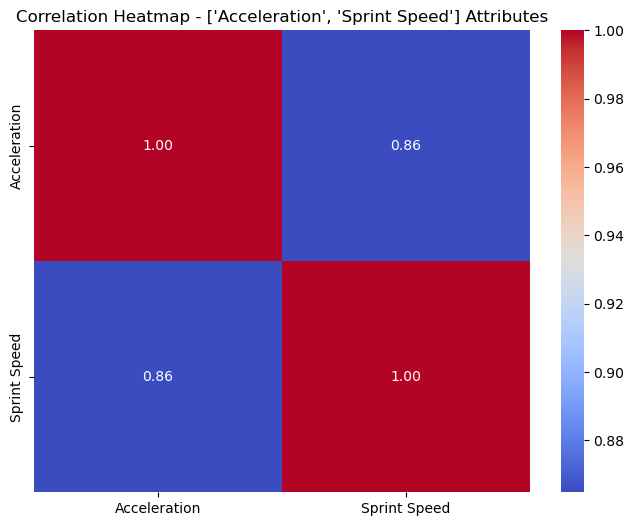

VIF for ['Acceleration', 'Sprint Speed'] Attributes:
       Variable         VIF
0  Acceleration  138.768725
1  Sprint Speed  138.768725


In [23]:
# Investigate the 'Pace' category
analyze_collinearity(df, pace)

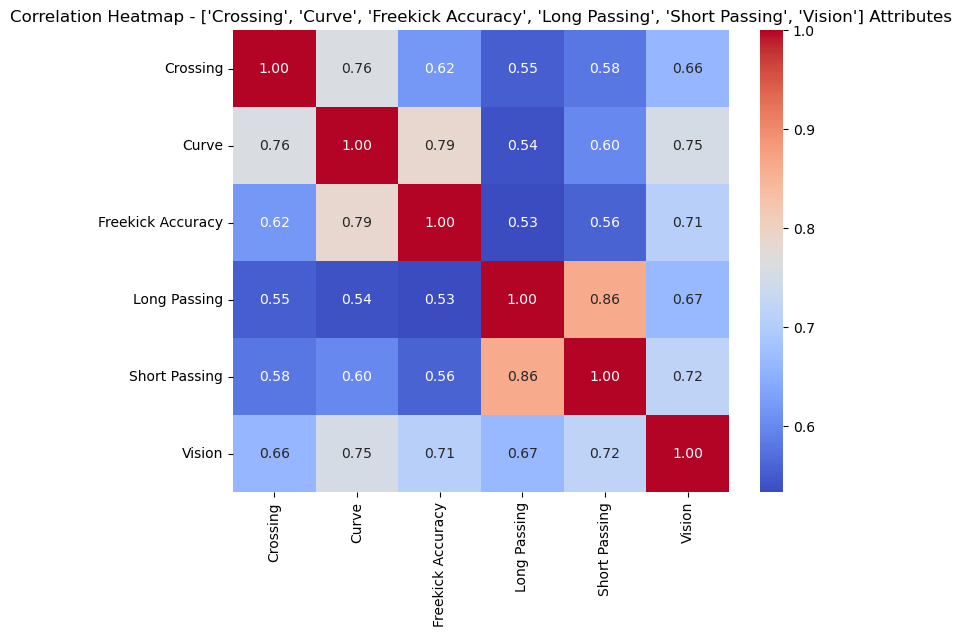

VIF for ['Crossing', 'Curve', 'Freekick Accuracy', 'Long Passing', 'Short Passing', 'Vision'] Attributes:
            Variable         VIF
0           Crossing   43.992611
1              Curve   60.849149
2  Freekick Accuracy   33.770383
3       Long Passing   94.917923
4      Short Passing  122.255904
5             Vision   71.230683


In [24]:
# Investigate the 'Passing' category
analyze_collinearity(df, passing)

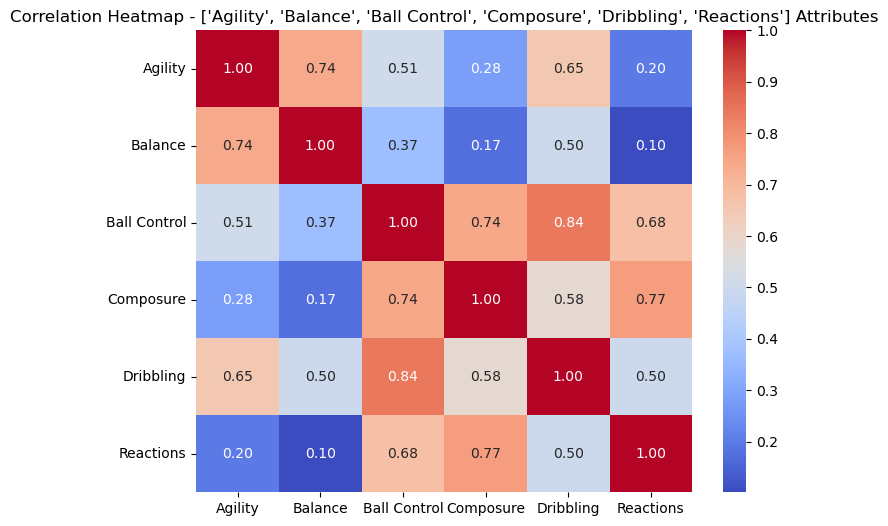

VIF for ['Agility', 'Balance', 'Ball Control', 'Composure', 'Dribbling', 'Reactions'] Attributes:
       Variable         VIF
0       Agility   89.338757
1       Balance   64.392734
2  Ball Control  258.878123
3     Composure  115.567980
4     Dribbling  126.395486
5     Reactions  118.669932


In [25]:
# Investigate the 'Dribbling' category
analyze_collinearity(df, movement)

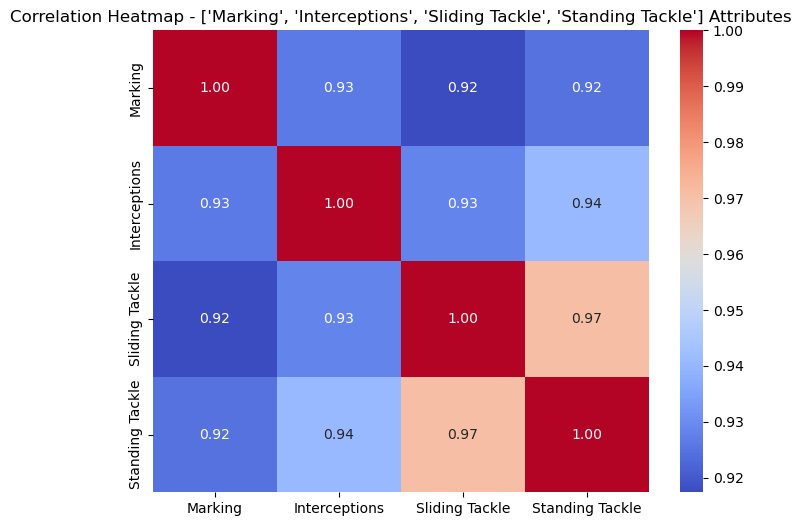

VIF for ['Marking', 'Interceptions', 'Sliding Tackle', 'Standing Tackle'] Attributes:
          Variable         VIF
0          Marking   79.502270
1    Interceptions   95.049335
2   Sliding Tackle  158.546677
3  Standing Tackle  202.836990


In [26]:
# Investigate the 'Defending' category
analyze_collinearity(df, defending)

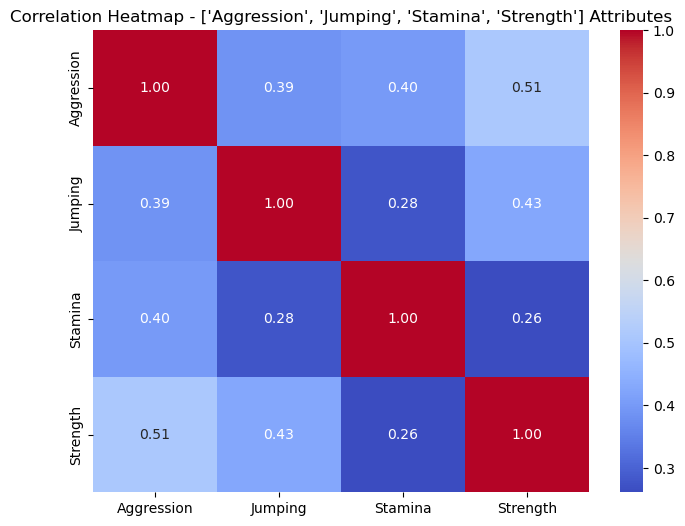

VIF for ['Aggression', 'Jumping', 'Stamina', 'Strength'] Attributes:
     Variable        VIF
0  Aggression  30.956837
1     Jumping  36.127561
2     Stamina  32.677905
3    Strength  37.993442


In [27]:
# Investigate the 'Physical' category
analyze_collinearity(df, physical)

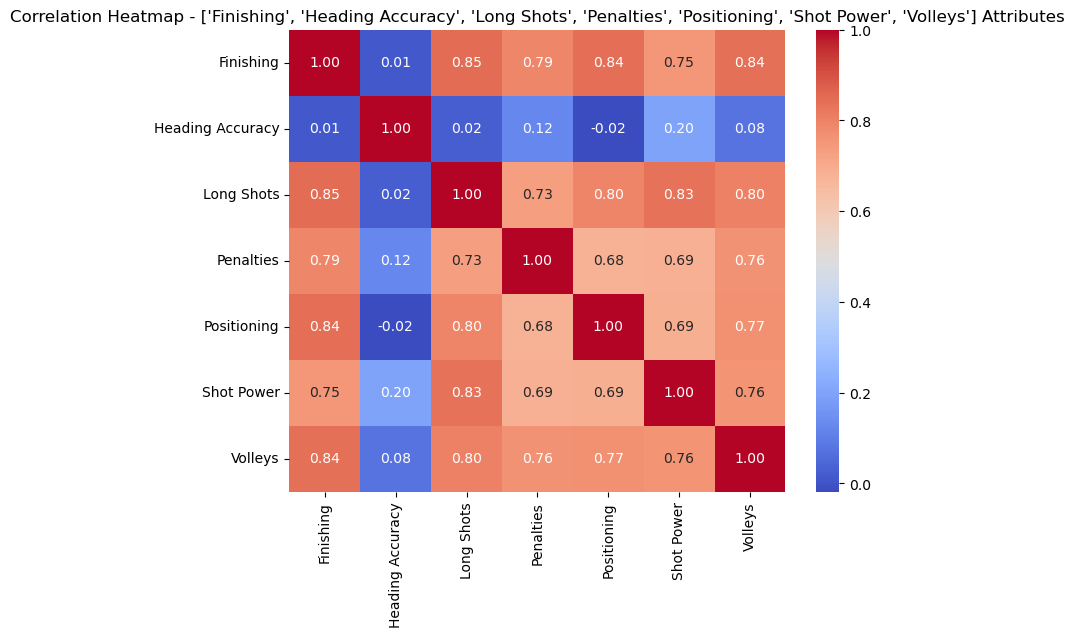

VIF for ['Finishing', 'Heading Accuracy', 'Long Shots', 'Penalties', 'Positioning', 'Shot Power', 'Volleys'] Attributes:
           Variable        VIF
0         Finishing  70.553583
1  Heading Accuracy  19.904752
2        Long Shots  69.140329
3         Penalties  53.784152
4       Positioning  55.190958
5        Shot Power  82.003809
6           Volleys  48.135119


In [28]:
# Investigate the 'Shooting' category
analyze_collinearity(df, shooting)

In [29]:
# Create a new DataFrame df_reduced
df_reduced = df.copy()

# Combine attributes within each category and create new columns in df_reduced
df_reduced['Pace'] = df[pace].mean(axis=1)
df_reduced['Shooting'] = df[shooting].mean(axis=1)
df_reduced['Passing'] = df[passing].mean(axis=1)
df_reduced['Movement'] = df[movement].mean(axis=1)
df_reduced['Defending'] = df[defending].mean(axis=1)
df_reduced['Physical'] = df[physical].mean(axis=1)

# Drop the original columns for each category in df_reduced
df_reduced.drop(columns=pace + shooting + passing + movement + defending + physical, inplace=True)

In [30]:
df_reduced.head()

,Overall,Age,Height(in cm),Weight(in kg),Pace,Shooting,Passing,Movement,Defending,Physical
0,91,35,169,67,81.5,84.714286,90.833333,93.666667,29.75,62.50
1,91,34,185,81,79.5,87.571429,80.666667,85.000000,31.00,76.50
2,91,33,185,81,75.5,90.428571,78.333333,85.666667,36.25,82.25
3,91,31,181,70,74.5,82.428571,91.000000,85.333333,63.00,75.00
4,91,23,182,73,97.0,84.285714,77.666667,89.833333,32.50,76.00


In [31]:
df_reduced_cor_matrix = df_reduced.corr()
df_reduced_cor_matrix

,Overall,Age,Height(in cm),Weight(in kg),Pace,Shooting,Passing,Movement,Defending,Physical
Overall,1.000000,0.439484,0.058530,0.153831,0.177533,0.557784,0.659187,0.688525,0.311419,0.534046
Age,0.439484,1.000000,0.052558,0.205861,-0.203907,0.304613,0.328002,0.227701,0.219511,0.433650
Height(in cm),0.058530,0.052558,1.000000,0.738947,-0.404366,-0.130550,-0.311529,-0.442903,0.145861,0.360336
Weight(in kg),0.153831,0.205861,0.738947,1.000000,-0.360910,-0.034009,-0.212047,-0.321762,0.143560,0.438220
Pace,0.177533,-0.203907,-0.404366,-0.360910,1.000000,0.279152,0.281228,0.521164,-0.272333,-0.119946
Shooting,0.557784,0.304613,-0.130550,-0.034009,0.279152,1.000000,0.726115,0.717263,-0.355990,0.104002
Passing,0.659187,0.328002,-0.311529,-0.212047,0.281228,0.726115,1.000000,0.839560,0.099294,0.129523
Movement,0.688525,0.227701,-0.442903,-0.321762,0.521164,0.717263,0.839560,1.000000,-0.046887,0.109759
Defending,0.311419,0.219511,0.145861,0.143560,-0.272333,-0.355990,0.099294,-0.046887,1.000000,0.532531
Physical,0.534046,0.433650,0.360336,0.438220,-0.119946,0.104002,0.129523,0.109759,0.532531,1.000000


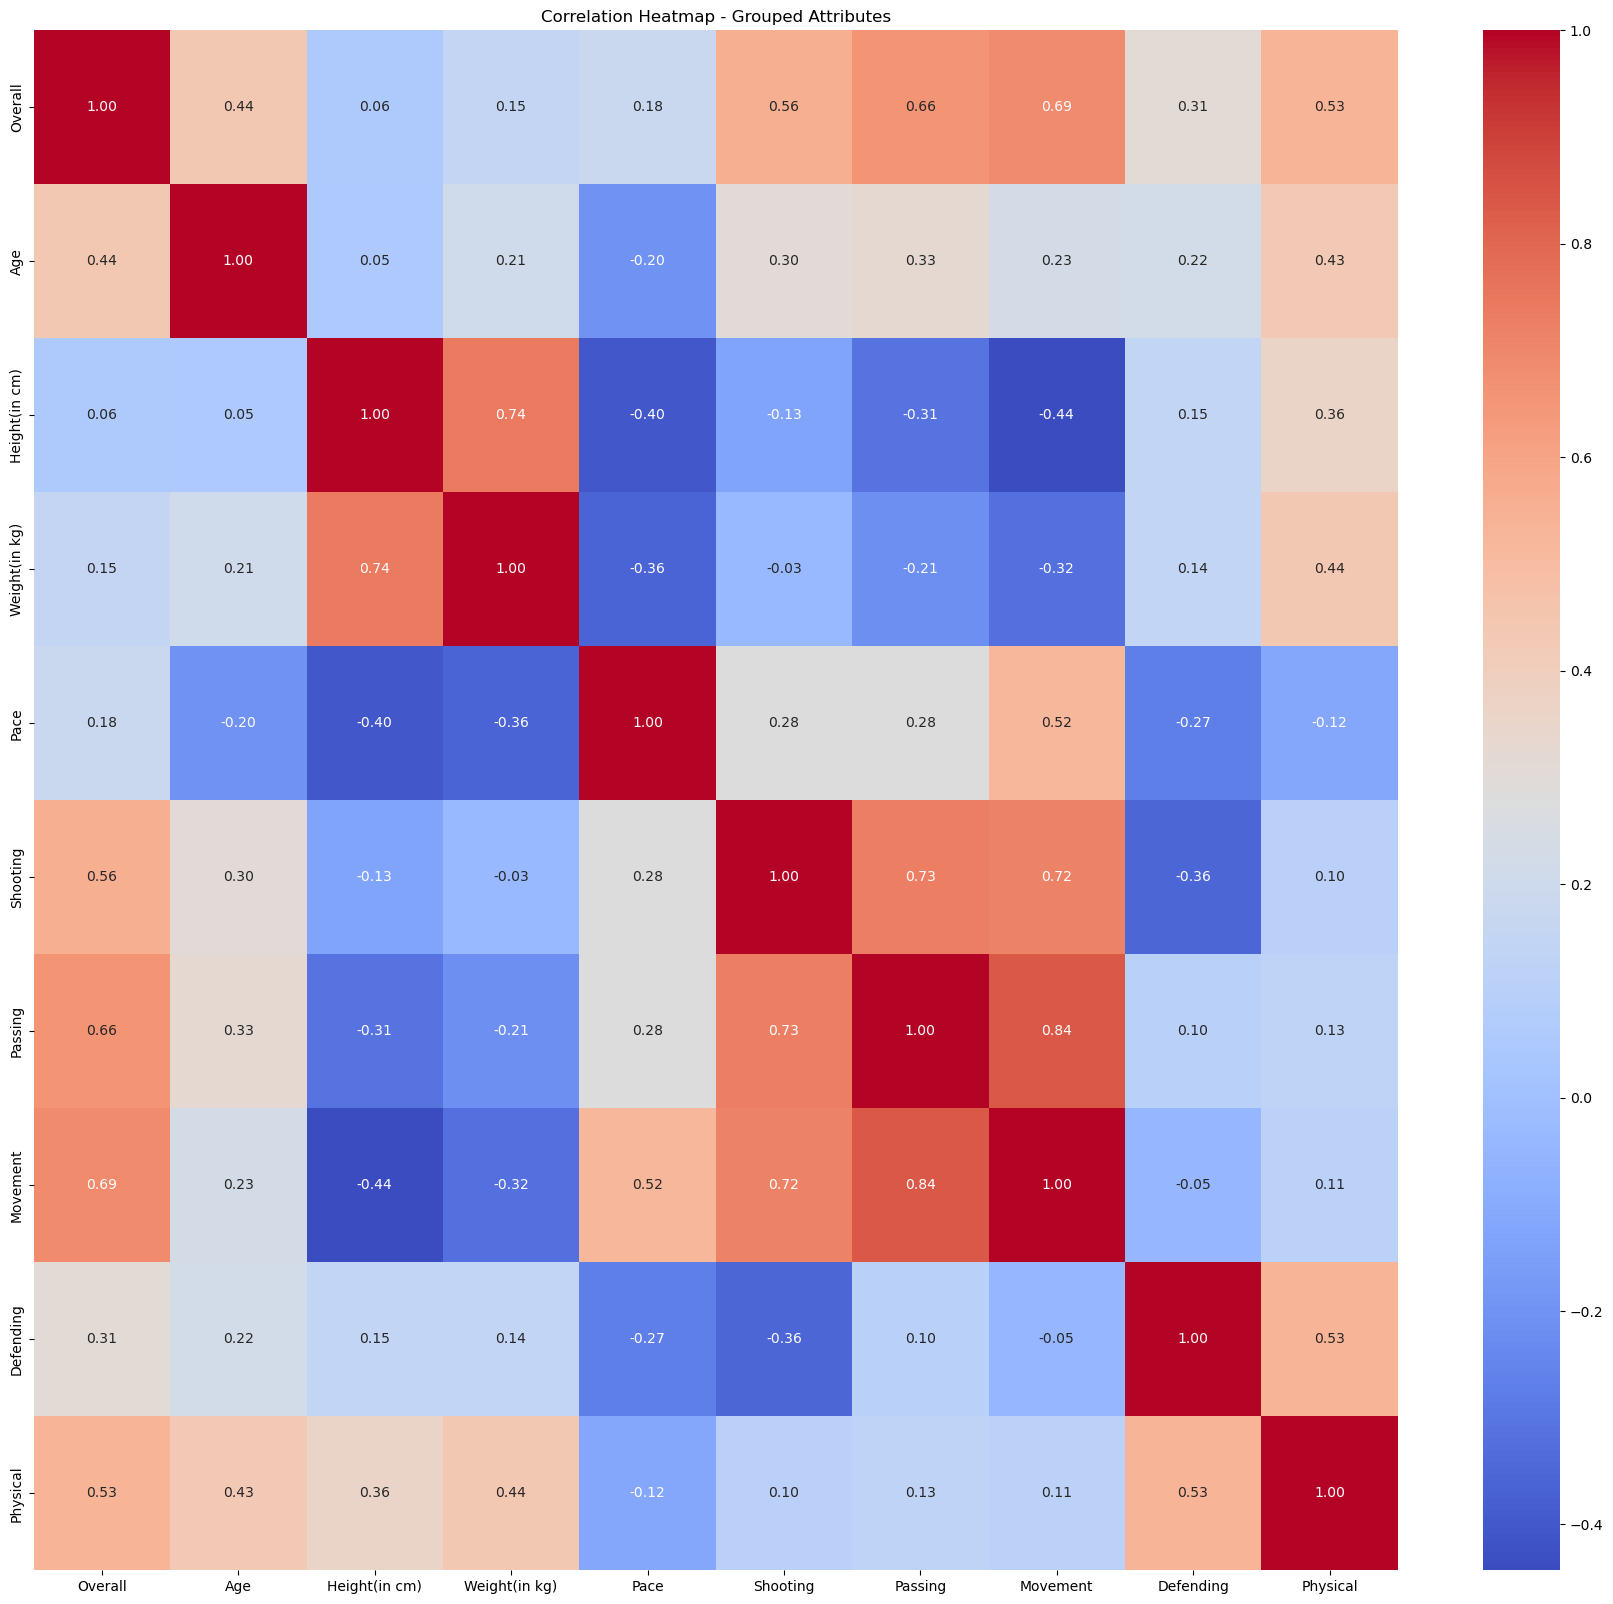

In [32]:
# Adjust the size of the plot
plt.figure(figsize=(22, 20))

# Create the Seaborn heatmap
sns.heatmap(df_reduced_cor_matrix, annot=True, cmap='coolwarm', fmt=".2f")

title = f"Correlation Heatmap - Grouped Attributes"
plt.title(title)

# Show the plot
plt.show()

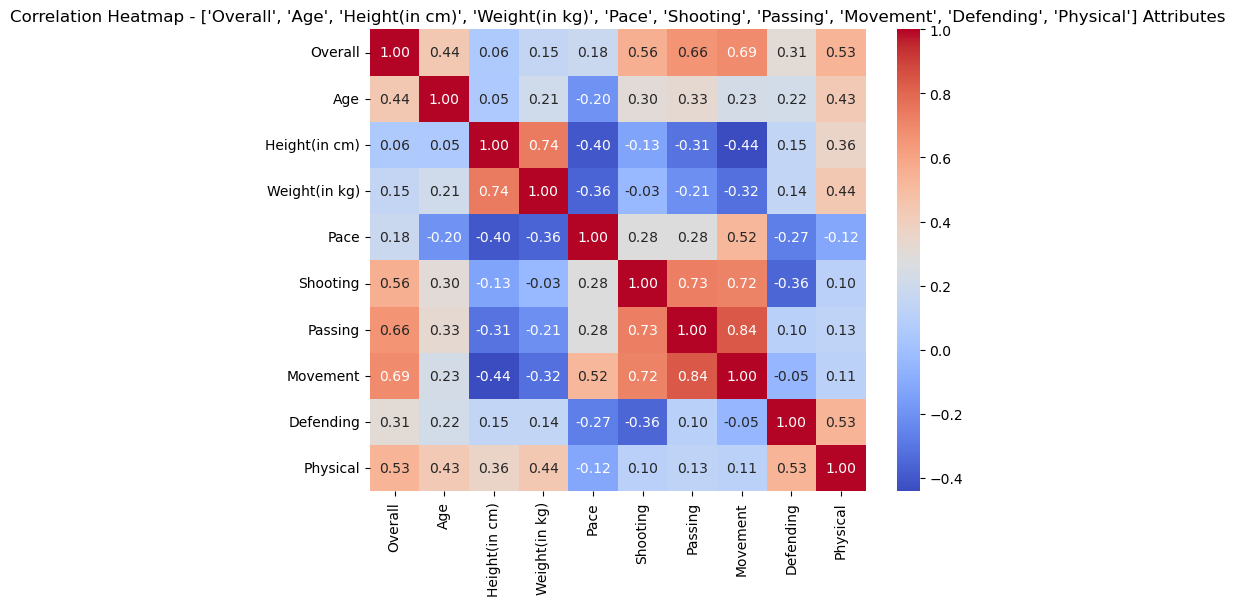

VIF for ['Overall', 'Age', 'Height(in cm)', 'Weight(in kg)', 'Pace', 'Shooting', 'Passing', 'Movement', 'Defending', 'Physical'] Attributes:
        Variable         VIF
0        Overall  417.088358
1            Age   45.994353
2  Height(in cm)  400.421065
3  Weight(in kg)  311.498804
4           Pace   73.368093
5       Shooting  128.197779
6        Passing  162.595891
7       Movement  409.298914
8      Defending   35.425090
9       Physical  134.227481


In [33]:
#Investigate collinearity in the 'reduced' dataframe.

# Create a variable for a list of all columns in the df_reduced dataframe
reduced_all_columns = df_reduced.columns.tolist()

# Investigate the 'Passing' category
analyze_collinearity(df_reduced, reduced_all_columns)

#### Correlation coefficients and p-values
>
>For the next portion of the analysis, I will display the correlation coefficients and p-values of each variable as it relates to the attribute 'Overall'. Then, I will group the attributes into their proper categories, and display which of these attributes are most correlated to the 'Overall' attribute.
>
>The correlation coefficients quantify the strength and direction of a linear relationship between variables, while p-values assess the statistical significance of the observed correlation. P-values and correlation coefficients are related in that a low p-value indicates that the observed correlation is unlikely to be due to chance, providing evidence for a real correlation in a larger population.

In [34]:
# For 'Overall' rating vs 'Pace' attributes
calculate_correlation(df, 'Overall', pace)

,correlation_coefficient,p_value
Sprint Speed,0.182161,4.113385e-122
Acceleration,0.160816,2.989548e-95


In [35]:
# For 'Overall' rating vs 'Shooting' attributes
calculate_correlation(df, 'Overall', shooting)

,correlation_coefficient,p_value
Shot Power,0.556885,0.0
Heading Accuracy,0.483031,0.0
Long Shots,0.477377,0.0
Positioning,0.453473,0.0
Volleys,0.434493,0.0
Penalties,0.389731,0.0
Finishing,0.388410,0.0


In [36]:
# For 'Overall' rating vs 'Passing' attributes
calculate_correlation(df, 'Overall', passing)

,correlation_coefficient,p_value
Short Passing,0.781633,0.0
Long Passing,0.631055,0.0
Vision,0.549554,0.0
Curve,0.519805,0.0
Crossing,0.518091,0.0
Freekick Accuracy,0.443266,0.0


In [37]:
# For 'Overall' rating vs 'Dribbling' attributes
calculate_correlation(df, 'Overall', movement)

,correlation_coefficient,p_value
Reactions,0.873307,0.000000e+00
Composure,0.811072,0.000000e+00
Ball Control,0.763731,0.000000e+00
Dribbling,0.563262,0.000000e+00
Agility,0.247503,5.765317e-227
Balance,0.116043,3.550208e-50


In [38]:
# For 'Overall' rating vs 'Defending' attributes
calculate_correlation(df, 'Overall', defending)

,correlation_coefficient,p_value
Marking,0.341191,0.000000e+00
Interceptions,0.330660,0.000000e+00
Standing Tackle,0.290674,4.298106e-316
Sliding Tackle,0.254011,2.367782e-239


In [39]:
# For 'Overall' rating vs 'Movement' attributes
calculate_correlation(df, 'Overall', movement)

,correlation_coefficient,p_value
Reactions,0.873307,0.000000e+00
Composure,0.811072,0.000000e+00
Ball Control,0.763731,0.000000e+00
Dribbling,0.563262,0.000000e+00
Agility,0.247503,5.765317e-227
Balance,0.116043,3.550208e-50


In [40]:
# For 'Overall' rating vs 'Physical' attributes
calculate_correlation(df, 'Overall', physical)

,correlation_coefficient,p_value
Stamina,0.490961,0.000000e+00
Aggression,0.471650,0.000000e+00
Strength,0.343998,0.000000e+00
Jumping,0.257503,3.762929e-246


In [41]:
# For the 'Overall' rating of the 'reduced' dataframe and its columns
calculate_correlation(df_reduced, 'Overall', reduced_all_columns)

,correlation_coefficient,p_value
Overall,1.000000,0.000000e+00
Movement,0.688525,0.000000e+00
Passing,0.659187,0.000000e+00
Shooting,0.557784,0.000000e+00
Physical,0.534046,0.000000e+00
Age,0.439484,0.000000e+00
Defending,0.311419,0.000000e+00
Pace,0.177533,5.481887e-116
Weight(in kg),0.153831,3.182197e-87
Height(in cm),0.058530,6.688789e-14


### Interpretation of results (using the original dataframe with all player attributes)
>
##### Pace category
> Of the two attributes in this category ('Sprint Speed' and 'Acceleration'), 'Sprint Speed' shows a marginally stronger correlation to the 'Overall' attribute. However, neither of these attributes appears to be strongly correlated to the 'Overall' attribute, with correlation coefficients of 0.182161 for 'Sprint Speed' and 0.160816 for 'Acceleration'.
>
##### Shooting category
> The attribute with the strongest correlation coefficient in this category is 'Shot Power', with a correlation coefficient of 0.556885. This is followed by 'Long Shots', with a moderately strong correlation coefficient of 0.477377. 
>
##### Passing category
> For the 'Passing' category, 'Short Passing' stands out as the attribute most strongly correlated to the 'Overall' attribute, with a correlation coefficient of 0.781633. Correlation coefficients over 0.65 could be considered strong.
>
##### Movement category
> 'Reactions' and 'Composure' both show strong correlations to the 'Overall' attribute, with correlation coefficients of 0.873307 and 0.811072 respectively. Since these correlation coefficients are larger than 0.65, they could be considered strong, and in fact, they are among the strongest of all the attributes in the original dataset.
>
##### Defending category
> As for the 'Dribbling' category, the most correlated attribute is 'Heading Accuracy', with a correlation coefficient of 0.483031. This suggests that 'Heading Accuracy' and the 'Overall' attribute are moderately correlated.
>
##### Human Attributes category
> Among the attributes in the 'Other' category ('Potential', 'Age', 'Weight(in kg), and 'Height(in cm), 'Potential' has the strongest correlation to the 'Overall' attribute. Calculated to a (rounded) value of 0.65, the correlation coefficient suggests a high level of correlation.
>
### Interpretation of results (using the reduced dataframe with player attributes grouped by category)
>
> Among the eight attributes in the aggregated dataframe, the top three most strongly correlated categories to the 'Overall' rating are 'Passing', 'Shooting', and 'Physical', with correlation coefficients of .66, .56, and .53 respectively. The weakest correlations to the 'Overall' rating are 'Height(in cm', 'Weight(in kg), and 'Pace', with correlation coefficients of .06, .15, and .18 respectively. All attributes show statistical significance, as they all have p-values that are 0 or close to 0. 
>
### Variance Inflation Factor and multicollinearity
>
> A Variance Inflation Factor (VIF) ranging from 45 to 385 for our attributes indicates a severe degree of multicollinearity in our dataset. Multicollinearity occurs when predictor variables are highly correlated, leading to inflated standard errors and unreliable coefficient estimates. In this context, VIF values well above the commonly recommended threshold of 10 suggest that the variance of the estimated coefficients for the soccer player attributes could be significantly inflated due to the strong intercorrelations among these variables. 

<a id='visualizations'></a>
## Visualizations
>
> For this portion of the project I will create visualizations to see communicate our insights about the relationships between soccer player attributes.

In [42]:
# Create a function to display each how each attribute is correlated to another attribute of our choosing.
def plot_correlation_bar(df, column, figsize=(10, 8), palette='RdBu_r'):
    sorted_correlation = df[column].sort_values(ascending=False)

    # Use Seaborn for the bar chart with color shading
    plt.figure(figsize=figsize)
    sns.barplot(x=sorted_correlation, y=sorted_correlation.index, palette=palette, orient='h')
    
    plt.title(f'Correlation Coefficients for {sorted_correlation.name} (Descending Order)')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Attributes')
    plt.show()


In [43]:
# Create a function to create a regression plot (scatter plot with regression line) between two variables
# of our choosing.
def plot_regression(df, x_col, y_col):
    sns.regplot(x=x_col, y=y_col, data=df, line_kws={'color': '#FF0000'})
    plt.title(f'Regression Plot ({x_col} vs {y_col})')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

## Correlations to Overall rating (original dataset)

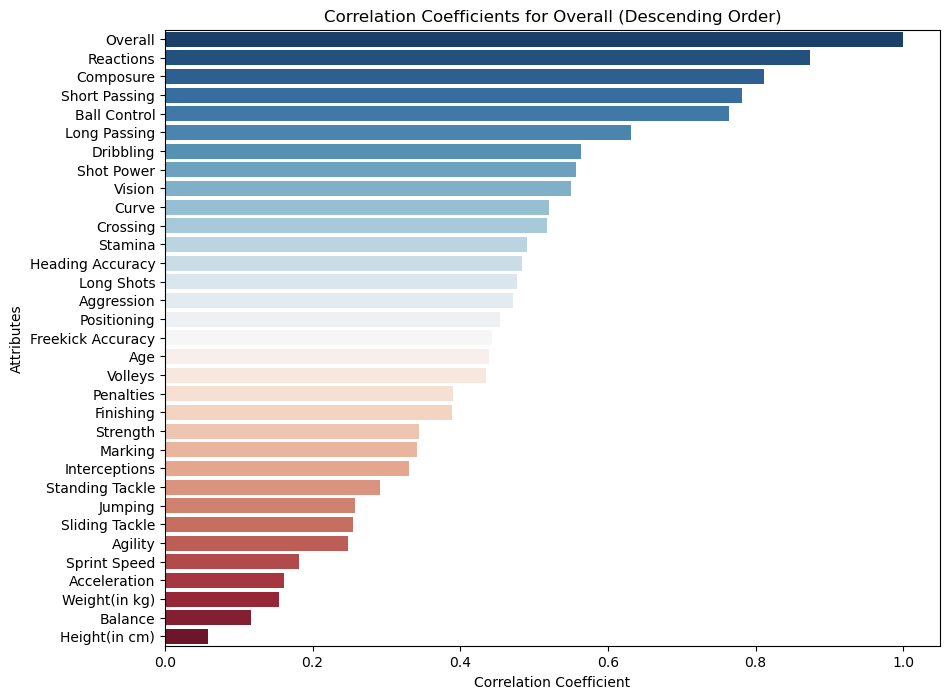

In [44]:
plot_correlation_bar(df_cor_matrix, 'Overall')

## The top three most correlated attributes to the 'Overall' rating (original dataset)

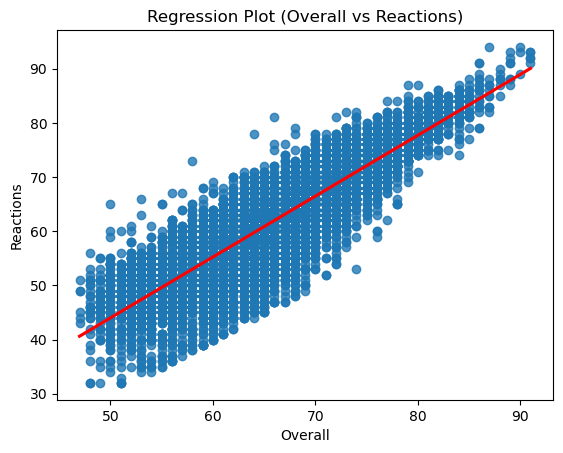

In [45]:
plot_regression(df, 'Overall', 'Reactions')

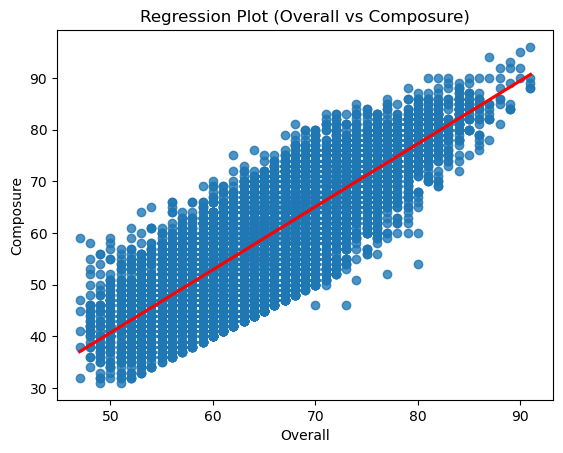

In [46]:
plot_regression(df, 'Overall', 'Composure')

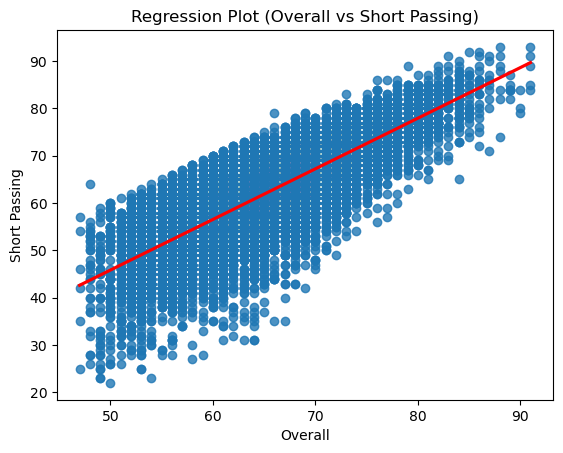

In [47]:
plot_regression(df, 'Overall', 'Short Passing')

## The three least correlated attributes to the 'Overall' rating (original dataset)

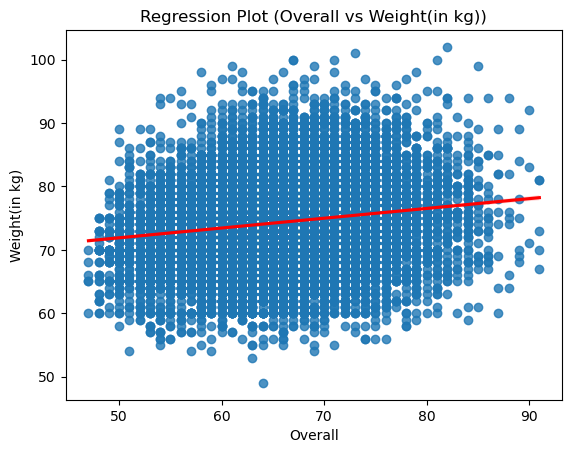

In [48]:
plot_regression(df, 'Overall', 'Weight(in kg)')

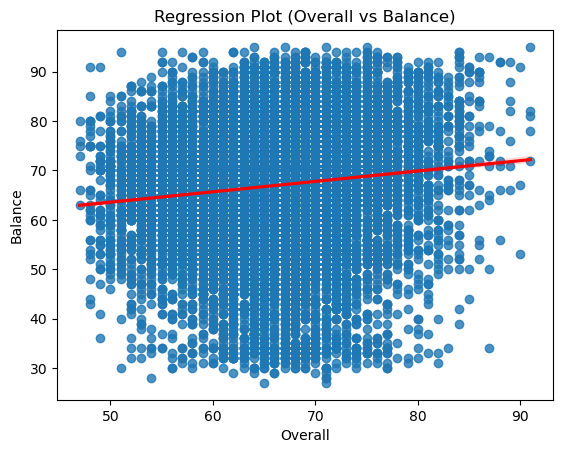

In [49]:
plot_regression(df, 'Overall', 'Balance')

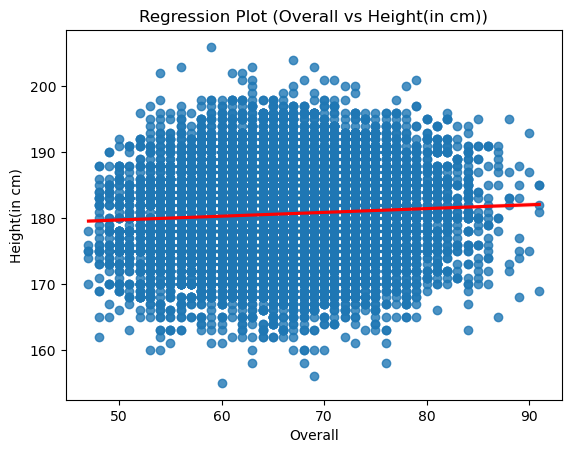

In [50]:
plot_regression(df, 'Overall', 'Height(in cm)')

## The top three most correlated attributes to the 'Overall' rating (aggregate dataset)

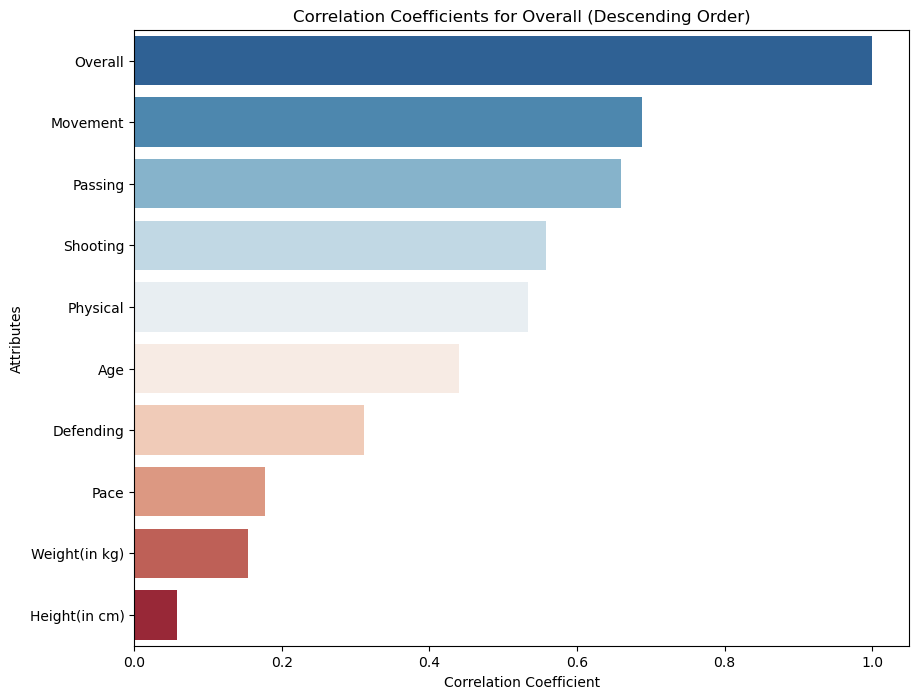

In [51]:
plot_correlation_bar(df_reduced_cor_matrix, 'Overall')

## Correlations to Overall rating (aggregated dataset)

### The two most correlated attributes to the 'Overall' rating (aggregated dataset)

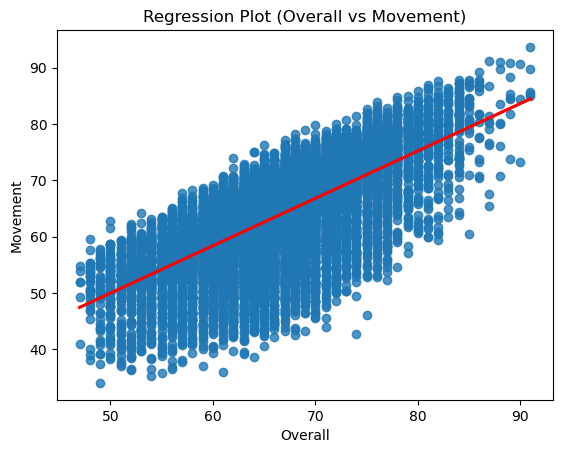

In [52]:
plot_regression(df_reduced, 'Overall', 'Movement')

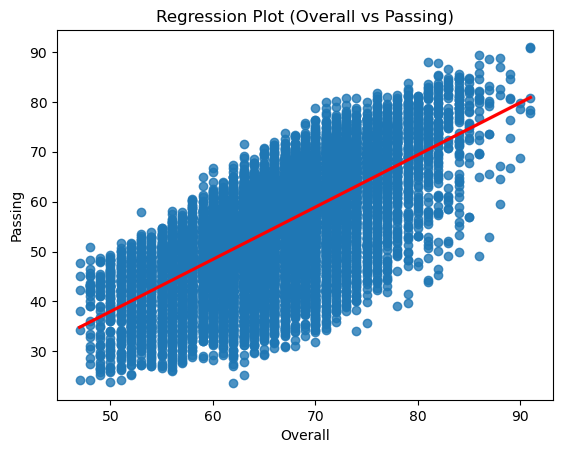

In [53]:
plot_regression(df_reduced, 'Overall', 'Passing')

### The two least correlated attributes to the 'Overall' rating (aggregated dataset)

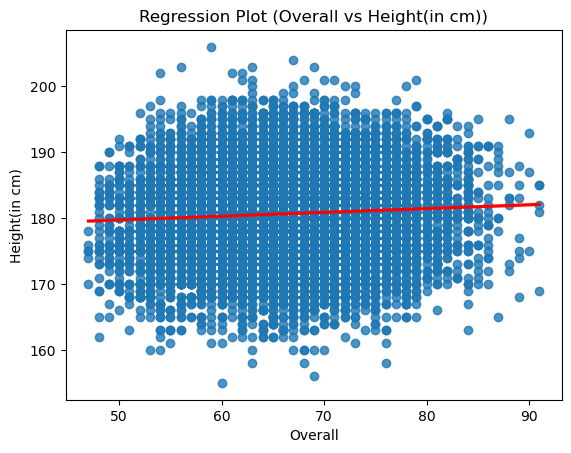

In [54]:
plot_regression(df_reduced, 'Overall', 'Height(in cm)')

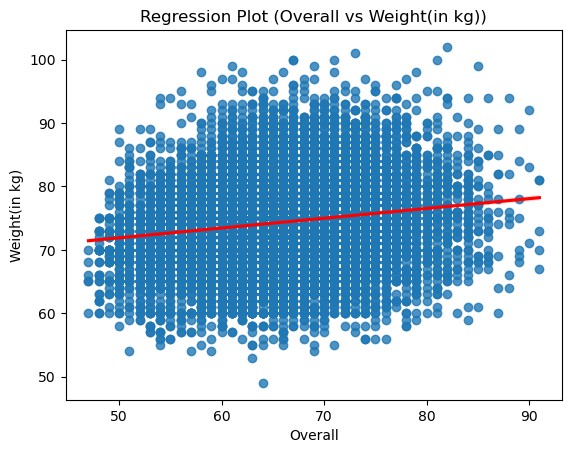

In [55]:
plot_regression(df_reduced, 'Overall', 'Weight(in kg)')

<a id='findings'></a>
## Findings and recommendations
>
#### Findings:
>After performing the analysis, it is clear that some attributes are more strongly correlated to a player's 'Overall' rating than others. In the original (cleaned) dataset, we can see that the 'Reactions', 'Composure' and 'Short Passing' attributes all have a strong positive correlation to the 'Overall' rating, while 'Height(in cm)', 'Balance' and 'Weight' have the weakest correlation to the 'Overall' rating.
>
>We see similar results in our aggregated dataset, with the 'Movement', 'Passing' and 'Shooting'  subsets showing the strongest positive correlation to the 'Overall' rating, and 'Height(in cm)', 'Weight(in kg)' and 'Pace' showing the weakest correlation to the 'Overall' rating. 
>
>This could be useful information for coaches, scouts, and other decision-makers, as it appears that players with higher ratings in the attributes of the 'Movement' and 'Passing' subsets tend to have higher 'Overall' ratings. It can also be determined that a player's height and weight do not have a strong correlation to better abilities on the field. 
>
>Knowing this information can help team managers design strategies and tactics on the field, as well as implement improvement plans for weaker players. 
>
#### Recommendations:
>
>Recommendation 1: Emphasize the development of attributes with strong correlations.
	Given the strong correlations identified in the analysis, particularly attributes such as ‘Reactions,’ ‘Composure,’ ‘Short Passing,’ and ‘Ball Contol,’ I recommend that soccer teams prioritize the development of these specific attributes in player training programs. Focusing on enhancing these attributes could potentially result in a significant improvement in players’ overall ratings. This aligns with the organizational need to optimize player performance and team composition.
>    
Recommendation 2: Implement data-driven recruitment strategies.
	To further leverage the insights gained from the analysis, I recommend that soccer teams incorporate data-driven recruitment strategies. By considering attributes with high correlations to the overall rating, teams can make more informed decisions when scouting and recruiting players. This aligns with the research question’s aim to identify attributes closely correlated with players’ overall ratings and translates into practical actions that address the organizational need for effective talent recruitment. Implementing these recommendations can contribute to a more competitive and strategically aligned soccer team. 


## Limitations
>
### Multicollinearity
> Some player attributes exhibit collinearity, hindering precise isolation of each attribute's impact on the 'Overall' rating. Addressing this challenge may involve more advanced statistical techniques or feature engineering to enhance model precision.
>
### Human Element in Soccer Players
> Soccer players are multifaceted individuals, and their on-field performance is influenced by unquantifiable factors such as teamwork, leadership, injuries, and mental resilience. The complexity of human behavior and unpredictable elements in sports may not be fully captured by statistical models
>
### Temporal Considerations
> The study may be subject to temporal limitations as player attributes and performance evolve over time. Changes in coaching staff, team dynamics, or individual player development could influence the relationship between attributes and the 'Overall' rating. 

### Sources:
> https://dataschool.com/fundamentals-of-analysis/correlation-and-p-value/
>
> https://online.stat.psu.edu/stat462/node/180/
>
> https://fifauteam.com/fifa-21-attributes-guide/
>
> https://www.statsmodels.org/stable/index.html 